# PROCESO DE OPTIMIZACIÓN CON PYMOO

In [10]:
pip install pymoo

     ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
      --------------------------------------- 0.0/1.3 MB 1.3 MB/s eta 0:00:01
      --------------------------------------- 0.0/1.3 MB 1.3 MB/s eta 0:00:01
     -- ------------------------------------- 0.1/1.3 MB 573.4 kB/s eta 0:00:03
     --- ------------------------------------ 0.1/1.3 MB 726.2 kB/s eta 0:00:02
     ------ --------------------------------- 0.2/1.3 MB 888.4 kB/s eta 0:00:02
     ------- -------------------------------- 0.2/1.3 MB 1.0 MB/s eta 0:00:02
     ------------ --------------------------- 0.4/1.3 MB 1.2 MB/s eta 0:00:01
     --------------- ------------------------ 0.5/1.3 MB 1.5 MB/s eta 0:00:01
     ------------------------ --------------- 0.8/1.3 MB 1.9 MB/s eta 0:00:01
     -------------------------------- ------- 1.0/1.3 MB 2.2 MB/s eta 0:00:01
     ---------------------------------------- 1.3/1.3 MB 2.5 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build depen

In [1]:
import pandas as pd
df = pd.read_csv("dataset.csv")

In [2]:
df.head

<bound method NDFrame.head of          Drift   pc1   pc2   pc3   pc4  pv1  pv2  pv3  pv4  MasaPropia  \
0     0.004221  0.25  0.25  0.25  0.25  0.2  0.2  0.2  0.4      6300.0   
1     0.004124  0.25  0.25  0.25  0.25  0.2  0.2  0.2  0.6      7080.0   
2     0.005613  0.25  0.25  0.25  0.25  0.2  0.2  0.4  0.2      6300.0   
3     0.004334  0.25  0.25  0.25  0.25  0.2  0.2  0.4  0.4      7080.0   
4     0.004199  0.25  0.25  0.25  0.25  0.2  0.2  0.4  0.6      7860.0   
...        ...   ...   ...   ...   ...  ...  ...  ...  ...         ...   
6555  0.000478  0.65  0.65  0.65  0.65  0.6  0.6  0.4  0.4     14040.0   
6556  0.000403  0.65  0.65  0.65  0.65  0.6  0.6  0.4  0.6     14820.0   
6557  0.000574  0.65  0.65  0.65  0.65  0.6  0.6  0.6  0.2     14040.0   
6558  0.000492  0.65  0.65  0.65  0.65  0.6  0.6  0.6  0.4     14820.0   
6559  0.000414  0.65  0.65  0.65  0.65  0.6  0.6  0.6  0.6     15600.0   

                Px  
0     57699.704555  
1     60071.550118  
2     57699.704555

In [3]:
import pickle

In [4]:
# Loading Existing Models

Drift_model_path = "Drift.pkl"
MasaPropia_model_path = "MasaPropia.pkl"

with open(Drift_model_path, 'rb') as f:
    Drift_model = pickle.load(f)

with open(MasaPropia_model_path , 'rb') as f:
    MasaPropia_model = pickle.load(f)

In [5]:
X = df.drop(columns =  ["Drift" , "MasaPropia","Px"])

In [6]:
Drift_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['pc1', 'pc2', 'pc3', 'pc4', 'pv1', 'pv2', 'pv3', 'pv4'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('one_hot_encoder',
                                                                   OneHotEncoder())]),
                                                  Index([], dtype='object'))])),
                ('regressor', RandomForestRegressor())])

In [7]:
Drift_model.predict(X)

array([0.00425457, 0.00415684, 0.00570744, ..., 0.00057289, 0.00048941,
       0.00040873])

In [8]:
MasaPropia_model.predict(X)

array([ 6471. ,  7282.2,  6481.2, ..., 13827. , 14676. , 15412.2])

In [11]:
from pymoo.core.variable import Choice, Real, Integer


In [12]:
X.columns

Index(['pc1', 'pc2', 'pc3', 'pc4', 'pv1', 'pv2', 'pv3', 'pv4'], dtype='object')

In [13]:
mixed_variables = {
    "pc1" : Real(bounds=(df['pc1'].min(),df['pc1'].max())),
    "pc2" : Real(bounds=(df['pc2'].min(),df['pc2'].max())),
    "pc3" : Real(bounds=(df['pc3'].min(),df['pc3'].max())),
    "pc4" : Real(bounds=(df['pc4'].min(),df['pc4'].max())),
    "pv1" : Real(bounds=(df['pv1'].min(),df['pv1'].max())),
    "pv2" : Real(bounds=(df['pv2'].min(),df['pv2'].max())),
    "pv3" : Real(bounds=(df['pv3'].min(),df['pv3'].max())),
    "pv4" : Real(bounds=(df['pv4'].min(),df['pv4'].max())),
}

In [14]:
mixed_variables

{'pc1': <pymoo.core.variable.Real at 0x269df5f3680>,
 'pc2': <pymoo.core.variable.Real at 0x26994445f10>,
 'pc3': <pymoo.core.variable.Real at 0x269ff84b530>,
 'pc4': <pymoo.core.variable.Real at 0x269df5f39e0>,
 'pv1': <pymoo.core.variable.Real at 0x269944450d0>,
 'pv2': <pymoo.core.variable.Real at 0x26994445070>,
 'pv3': <pymoo.core.variable.Real at 0x26994444b60>,
 'pv4': <pymoo.core.variable.Real at 0x26994444a40>}

In [15]:
import numpy as np

In [16]:
from pymoo.core.problem import (
                        Problem,           # Vectorized - since most MO algorithms work with populations, this class evaluates a set of solutons at once
                        ElementwiseProblem # Inherits from the Problem Class, works with a single solution at a time
                               )
from pymoo.problems.functional import FunctionalProblem  # Inherits from the ElementwiseProblem class , works with functions for each objective and constraint

In [17]:
class DriftMasa(Problem):

    def __init__(self, **kwargs):
        super().__init__(vars = mixed_variables, n_obj = 1,
                         n_ieq_constr = 1 , n_eq_constr = 0 ,
                         **kwargs)

    def _evaluate(self, x, out, *args, **kwargs):

        # Type conversion for Prediction and Constraint
        temp_df = pd.DataFrame(list(x))


        obj1 = 1*MasaPropia_model.predict(temp_df) # Minimase

        #equality_constraint = temp_df[["Coke %", "Minerals %"]].sum(axis = 1) - 100 #=0
        inequality_constraint = Drift_model.predict(temp_df) - 0.005#<0

        out["F"] = np.column_stack([obj1 ])
        out["G"] = np.column_stack([inequality_constraint])
        #out["H"] = np.column_stack([equality_constraint])

In [18]:
from pymoo.algorithms.moo.nsga2 import NSGA2
algorithm = NSGA2(pop_size = 200)


Compiled modules for significant speedup can not be used!
https://pymoo.org/installation.html#installation

To disable this warning:
from pymoo.config import Config
Config.warnings['not_compiled'] = False



In [19]:
from pymoo.algorithms.soo.nonconvex.de import DE # Differential Evolution
from pymoo.algorithms.soo.nonconvex.ga import GA # Genetic Algorithm
from pymoo.algorithms.soo.nonconvex.nelder import NelderMead
from pymoo.optimize import minimize

In [20]:
from pymoo.core.mixed import MixedVariableMating, MixedVariableSampling, MixedVariableDuplicateElimination

problem = DriftMasa()

algorithm = NSGA2(pop_size = 100,
                  sampling = MixedVariableSampling(),
                  mating=MixedVariableMating(eliminate_duplicates=MixedVariableDuplicateElimination()),
                  eliminate_duplicates = False)

res = minimize(problem,
               algorithm,
               ('n_gen', 100),
               verbose = False,
              seed = 42)

In [21]:
result = pd.DataFrame(list(res.X))
result['MasaPropia'] = 1*res.F
result['Drift'] = Drift_model.predict(result)

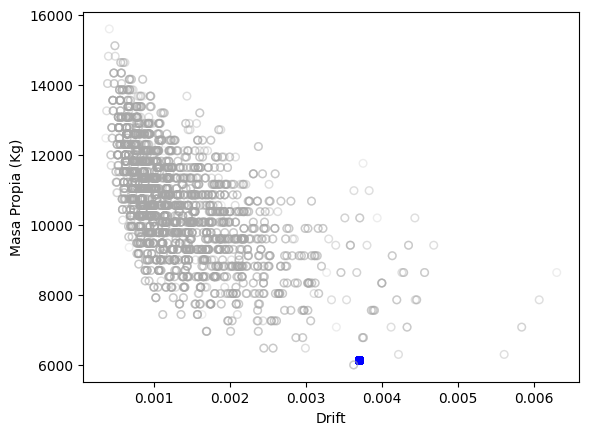

In [22]:
import matplotlib.pyplot as plt
plt.scatter(result['Drift'] , result['MasaPropia'], s = 30, color = 'blue');
plt.scatter(df['Drift'] , df['MasaPropia'], s = 30, alpha = 0.2, facecolors='none', edgecolors='#A6A6A6');
plt.xlabel("Drift")
plt.ylabel("Masa Propia (Kg)");

In [23]:
result.head(100)

,pc1,pc2,pc3,pc4,pv1,pv2,pv3,pv4,MasaPropia,Drift
0,0.256309,0.428836,0.255439,0.282968,0.201013,0.277832,0.263991,0.284658,6127.2,0.003697
1,0.325858,0.405370,0.284896,0.313132,0.203721,0.203979,0.256096,0.201810,6127.2,0.003697
2,0.254720,0.405555,0.307869,0.271891,0.200455,0.202053,0.273358,0.244864,6127.2,0.003697
3,0.272374,0.443930,0.284080,0.295202,0.201099,0.238335,0.221663,0.212948,6127.2,0.003697
4,0.257463,0.413880,0.282823,0.318001,0.244668,0.216051,0.261840,0.264555,6127.2,0.003697
...,...,...,...,...,...,...,...,...,...,...
95,0.272011,0.436300,0.300133,0.277463,0.200574,0.213791,0.246263,0.226522,6127.2,0.003697
96,0.296513,0.403171,0.297544,0.257582,0.234187,0.245598,0.268721,0.264494,6127.2,0.003697
97,0.253573,0.389709,0.271793,0.284681,0.223265,0.255935,0.241128,0.287131,6127.2,0.003697
98,0.339117,0.415289,0.268868,0.284248,0.204984,0.223723,0.237080,0.265324,6127.2,0.003697
